In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset (Adjust the file path as needed)
data = pd.read_csv("/content/diabetes.csv")

# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns

# Display the first 10 rows of the dataset
print(data.head(10))

# Data Preprocessing
X = data.drop('Outcome', axis=1)  # Features
y = data['Outcome']  # Target variable

# Normalize the feature variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Scaling the features


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   
5            5      116             74              0        0  25.6   
6            3       78             50             32       88  31.0   
7           10      115              0              0        0  35.3   
8            2      197             70             45      543  30.5   
9            8      125             96              0        0   0.0   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   2

Train-Test Split:

In [5]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


Train the Decision Tree Model:


In [6]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree Classifier
dtree = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree model
dtree.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

Make Predictions:

In [7]:
# Predictions
y_pred = dtree.predict(X_test)  # Make predictions

Evaluate the Model (Print Accuracy):

In [8]:
from sklearn.metrics import accuracy_score

# Predictions
y_pred = dtree.predict(X_test)

# Accuracy of the Decision Tree model
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Model Accuracy: {accuracy * 100:.2f}%")


Decision Tree Model Accuracy: 74.68%


Train the Logistic Regression Model

In [9]:
from sklearn.linear_model import LogisticRegression

# Model Training
model = LogisticRegression(max_iter=1000)  # Adding max_iter in case of convergence issues

model.fit(X_train, y_train)  # Fit the model


LogisticRegression(max_iter=1000)

Make Predictions

In [10]:
# Predictions
y_pred = model.predict(X_test)  # Make predictions


 Evaluate the Model and Print Accuracy


In [11]:
from sklearn.metrics import accuracy_score

# Accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 75.32%


Train-Test Split

In [12]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


Train Logistic Regression and Decision Tree Models



In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Initialize models
logreg = LogisticRegression(max_iter=1000)
dtree = DecisionTreeClassifier(random_state=42)

# Train the models
logreg.fit(X_train, y_train)
dtree.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

Ensemble Model: Voting Classifier

In [14]:
from sklearn.ensemble import VotingClassifier

# Initialize the Voting Classifier (Hard Voting)
ensemble_model = VotingClassifier(estimators=[('logreg', logreg), ('dtree', dtree)], voting='hard')

# Train the ensemble model
ensemble_model.fit(X_train, y_train)


VotingClassifier(estimators=[('logreg', LogisticRegression(max_iter=1000)),
                             ('dtree',
                              DecisionTreeClassifier(random_state=42))])

 Make Predictions and Evaluate Accuracy

In [15]:
from sklearn.metrics import accuracy_score

# Predictions
y_pred = ensemble_model.predict(X_test)

# Accuracy of the ensemble model
accuracy = accuracy_score(y_test, y_pred)
print(f"Ensemble Model Accuracy: {accuracy * 100:.2f}%")


Ensemble Model Accuracy: 80.52%


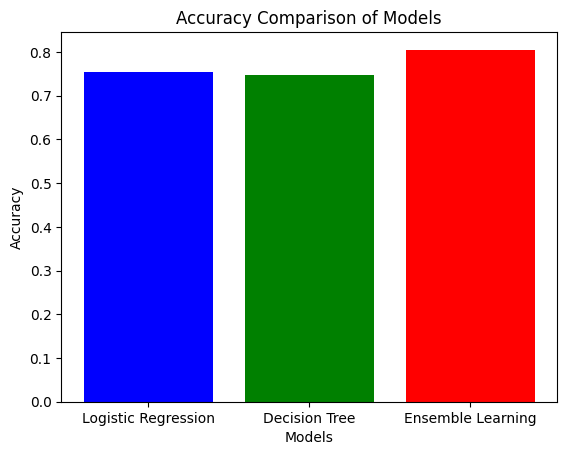

In [16]:
# Predictions for all models
logreg_pred = logreg.predict(X_test)
dtree_pred = dtree.predict(X_test)
ensemble_pred = ensemble_model.predict(X_test)

# Accuracy of each model
logreg_accuracy = accuracy_score(y_test, logreg_pred)
dtree_accuracy = accuracy_score(y_test, dtree_pred)
ensemble_accuracy = accuracy_score(y_test, ensemble_pred)

# Plotting the bar chart
accuracy_results = {
    'Logistic Regression': logreg_accuracy,
    'Decision Tree': dtree_accuracy,
    'Ensemble Learning': ensemble_accuracy
}
import matplotlib.pyplot as plt
plt.bar(accuracy_results.keys(), accuracy_results.values(), color=['blue', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Models')
plt.show()


In [17]:
# Predictions
logreg_pred = logreg.predict(X_test)
dtree_pred = dtree.predict(X_test)
ensemble_pred = ensemble_model.predict(X_test)

# Add the predictions to the original dataset (match the test data for predictions)
# Since we used `train_test_split`, make sure to add predictions for only the test data.
data['Logistic_Regression_Prediction'] = pd.Series(logreg.predict(X_scaled), index=data.index)
data['Decision_Tree_Prediction'] = pd.Series(dtree.predict(X_scaled), index=data.index)
data['Ensemble_Prediction'] = pd.Series(ensemble_model.predict(X_scaled), index=data.index)

# Save the updated dataset with the new columns
data.to_csv(r"/content/updated_diabetes_predictions.csv", index=False)

print("Dataset with predictions has been saved.")

Dataset with predictions has been saved.


In [18]:
from google.colab import files

# Download the saved CSV file
files.download(r"/content/updated_diabetes_predictions.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>